In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
adi = pd.read_csv('full_cleaned_data.tsv', sep='\t')

In [4]:
adi.head()

,Unnamed: 0,text,split,source,dialect,country,num_arabic_chars
0,1151,هه اصلا حاليا فى وفد قطري موجود بغزه واللعبه ه...,train,SHAMI,LEV,PL,51
1,1152,عادي طعميها لأنها ما راح تكتفي من صدرك صار بده...,train,SHAMI,LEV,PL,48
2,1153,اعملي اللي عليكي لوجه الله,train,SHAMI,LEV,PL,22
3,1154,حكت شفتها اكتر من مره بلبس قصير واكيد زوجي شافها,train,SHAMI,LEV,PL,39
4,1155,و هيا وإياه بتزوجو هه,train,SHAMI,LEV,PL,17


In [7]:
adi.groupby('dialect').count()

,Unnamed: 0,text,split,source,country,num_arabic_chars
dialect,,,,,,
EGY,31119,31119,31119,31119,31119,31119
GLF,26288,26288,26288,26288,26288,26288
IRQ,6055,6055,6055,6055,6055,6055
LEV,70083,70083,70083,70083,70083,70083
MGH,34101,34101,34101,34101,34101,34101
MSA,57422,57422,57422,57422,57422,57422


In [26]:
num_per_country = adi.groupby('country').agg({'dialect':'first', 'text':'count'})

In [76]:
num_per_country.rename(index={'PL':'IL'}, inplace=True)
num_per_country

,dialect,text
country,,
AE,GLF,760
BH,GLF,134
DJ,GLF,53
DZ,MGH,2225
EG,EGY,13150
IQ,IRQ,5797
JO,LEV,7220
KW,IRQ,258
LB,LEV,16048


In [11]:
countries = pd.read_csv("https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv")

In [77]:
countries['code'] = countries['Alpha-2 code'].str.replace('"', '').str.strip()
countries['lat'] = countries['Latitude (average)'].str.replace('"', '').str.strip()
countries['long'] = countries['Longitude (average)'].str.replace('"', '').str.strip()
countries_ready = countries[['Country', 'code', 'lat', 'long']]

In [87]:
joined = num_per_country.join(countries_ready.set_index('code'), how='left')
joined

,dialect,text,Country,lat,long
AE,GLF,760,United Arab Emirates,24,54
BH,GLF,134,Bahrain,26,50.55
DJ,GLF,53,Djibouti,11.5,43
DZ,MGH,2225,Algeria,28,3
EG,EGY,13150,Egypt,27,30
IL,LEV,8776,Israel,31.5,34.75
IQ,IRQ,5797,Iraq,33,44
JO,LEV,7220,Jordan,31,36
KW,IRQ,258,Kuwait,29.3375,47.6581
LB,LEV,16048,Lebanon,33.8333,35.8333


In [88]:
joined.loc['unknown'] = ['MSA', 98350, np.nan, 5, 60]
joined = joined.drop(['MSA'])
joined

,dialect,text,Country,lat,long
AE,GLF,760,United Arab Emirates,24,54
BH,GLF,134,Bahrain,26,50.55
DJ,GLF,53,Djibouti,11.5,43
DZ,MGH,2225,Algeria,28,3
EG,EGY,13150,Egypt,27,30
IL,LEV,8776,Israel,31.5,34.75
IQ,IRQ,5797,Iraq,33,44
JO,LEV,7220,Jordan,31,36
KW,IRQ,258,Kuwait,29.3375,47.6581
LB,LEV,16048,Lebanon,33.8333,35.8333


In [89]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

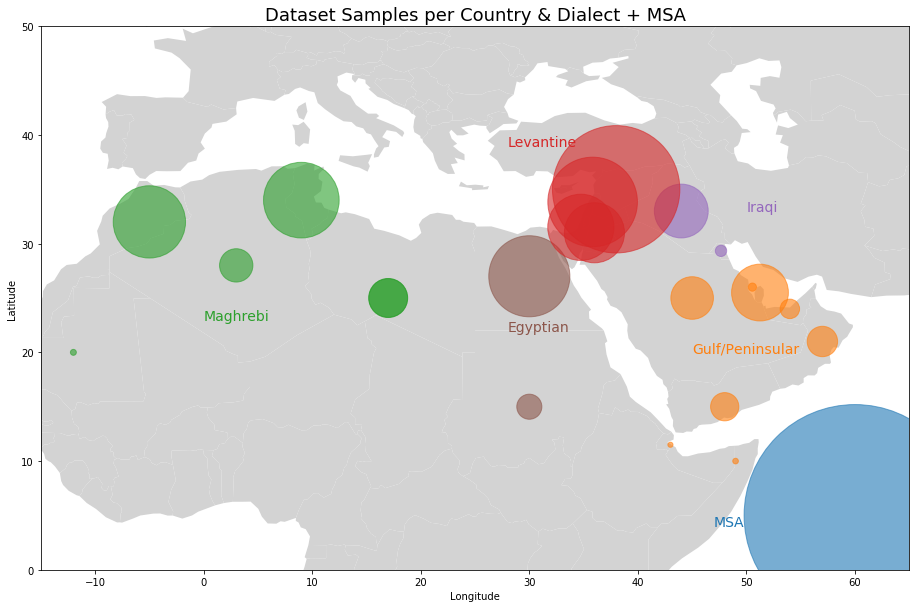

In [108]:
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

dialect_color_map = {
    'MSA':'#1f77b4', 'GLF':'#ff7f0e', 'MGH':'#2ca02c', 'LEV':'#d62728', 'IRQ':'#9467bd', 'EGY':'#8c564b'
}
colors = joined.dialect.map(dialect_color_map)
# Plotting volume per lang
plt.scatter(joined.long.astype('float'), joined.lat.astype('float'), 
              s=joined.text * 0.5,
              c=colors,
              alpha=0.6,
            )
#plt.colorbar(label='Number of sentences')

# Creating axis limits and title
plt.xlim([-15, 65])
plt.ylim([0, 50])

ax.text(0, 23, 'Maghrebi', color='#2ca02c', fontsize=14)
ax.text(28, 22, 'Egyptian', color='#8c564b', fontsize=14)
ax.text(28, 39, 'Levantine', color='#d62728', fontsize=14)
ax.text(45, 20, 'Gulf/Peninsular', color='#ff7f0e', fontsize=14)
ax.text(50, 33, 'Iraqi', color='#9467bd', fontsize=14)
ax.text(47, 4, 'MSA', color = '#1f77b4', fontsize=14)


plt.title("Dataset Samples per Country & Dialect + MSA", fontsize=18)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

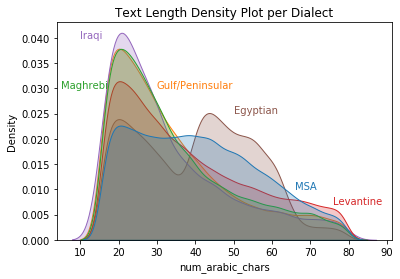

In [125]:
df_grouped = adi.groupby('dialect')
for dialect, group in df_grouped:
    fig = sns.kdeplot(group['num_arabic_chars'], shade=True, color=dialect_color_map[dialect])

fig.text(5, 0.030, 'Maghrebi', color='#2ca02c', fontsize=10)
fig.text(50, 0.025, 'Egyptian', color='#8c564b', fontsize=10)
fig.text(76, 0.007, 'Levantine', color='#d62728', fontsize=10)
fig.text(30, 0.030, 'Gulf/Peninsular', color='#ff7f0e', fontsize=10)
fig.text(10, 0.040, 'Iraqi', color='#9467bd', fontsize=10)
fig.text(66, 0.01, 'MSA', color = '#1f77b4', fontsize=10)
# # Plot multiple KDEs on the same figure
# fig = sns.kdeplot(adi.loc['sepal_width'], shade=True, color="r")
# fig = sns.kdeplot(df['sepal_length'], shade=True, color="b")

# Display the plot
plt.title('Text Length Density Plot per Dialect')
plt.show()

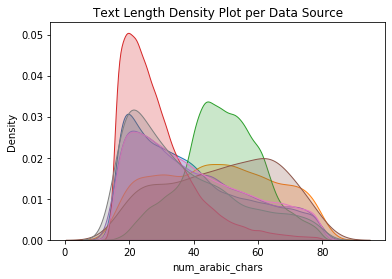

In [128]:
df_grouped = adi.groupby('source')
clist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
i = 0
for dialect, group in df_grouped:
    fig = sns.kdeplot(group['num_arabic_chars'], shade=True, color=clist[i])
    i += 1

# fig.text(5, 0.030, 'Maghrebi', color='#2ca02c', fontsize=10)
# fig.text(50, 0.025, 'Egyptian', color='#8c564b', fontsize=10)
# fig.text(76, 0.007, 'Levantine', color='#d62728', fontsize=10)
# fig.text(30, 0.030, 'Gulf/Peninsular', color='#ff7f0e', fontsize=10)
# fig.text(10, 0.040, 'Iraqi', color='#9467bd', fontsize=10)
# fig.text(66, 0.01, 'MSA', color = '#1f77b4', fontsize=10)
# # Plot multiple KDEs on the same figure
# fig = sns.kdeplot(adi.loc['sepal_width'], shade=True, color="r")
# fig = sns.kdeplot(df['sepal_length'], shade=True, color="b")

# Display the plot
plt.title('Text Length Density Plot per Data Source')
plt.show()